**Imports**

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_curve, auc

**Preparing the Data**

In [3]:
grapes = np.load('Quidraw_data/G_36_grapes.npy')
ant = np.load('Quidraw_data/G_36_ant.npy')
test_images = np.load('Quidraw_data/test_images.npy')
test_labels = np.load('Quidraw_data/test_labels.npy')

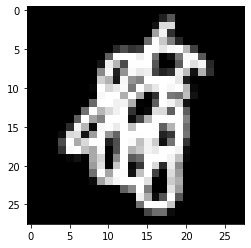

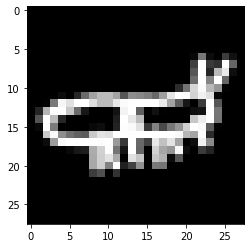

In [4]:
plt.imshow(grapes[0].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(ant[0].reshape(28,28), cmap='gray')
plt.show()

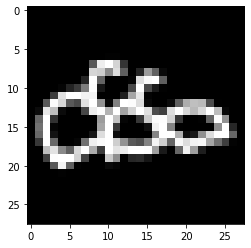

0


In [5]:
plt.imshow(test_images[100].reshape(28,28), cmap='gray')
plt.show()
print(test_labels[100])

In [6]:
train_images = np.concatenate((ant,grapes),axis=0)

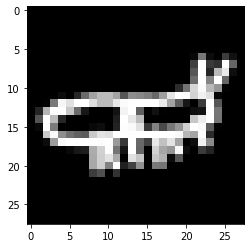

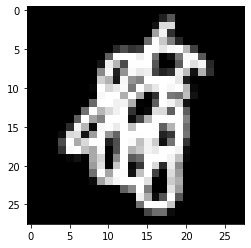

In [7]:
plt.imshow(train_images[0].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(train_images[1000].reshape(28,28), cmap='gray')
plt.show()

In [8]:
train_labels = np.concatenate((np.zeros(1000),np.ones(1000)),axis=0)

In [9]:
scaler=MinMaxScaler()
scaler.fit(train_images)
train_images = scaler.transform(train_images)
test_images = scaler.transform(test_images)

**Creating and Training the Baseline Model**

In [125]:
model =  Sequential()

model.add(Dense(1, input_dim=784, activation = "sigmoid"))

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [126]:
model.fit(x = train_images, 
                    y = train_labels, 
                    epochs=200, 
                    validation_data=(test_images,test_labels))

Epoch 1/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.7595 - val_loss: 0.4866 - val_accuracy: 0.8000
Epoch 2/200
63/63 [==============================] - 0s 855us/step - loss: 0.4424 - accuracy: 0.8145 - val_loss: 0.4673 - val_accuracy: 0.8070
Epoch 3/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8240 - val_loss: 0.4606 - val_accuracy: 0.8090
Epoch 4/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8305 - val_loss: 0.4584 - val_accuracy: 0.8110
Epoch 5/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 0.8315 - val_loss: 0.4555 - val_accuracy: 0.8150
Epoch 6/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8385 - val_loss: 0.4518 - val_accuracy: 0.8110
Epoch 7/200
63/63 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8395 - val_loss: 0.4504 - val_accuracy: 0.8150
Epoch 8/200

63/63 [==============================] - 0s 1ms/step - loss: 0.3082 - accuracy: 0.8765 - val_loss: 0.4543 - val_accuracy: 0.8230
Epoch 59/200
63/63 [==============================] - 0s 1ms/step - loss: 0.3071 - accuracy: 0.8795 - val_loss: 0.4546 - val_accuracy: 0.8200
Epoch 60/200
63/63 [==============================] - 0s 940us/step - loss: 0.3062 - accuracy: 0.8795 - val_loss: 0.4554 - val_accuracy: 0.8210
Epoch 61/200
63/63 [==============================] - 0s 1ms/step - loss: 0.3044 - accuracy: 0.8795 - val_loss: 0.4563 - val_accuracy: 0.8160
Epoch 62/200
63/63 [==============================] - 0s 953us/step - loss: 0.3039 - accuracy: 0.8835 - val_loss: 0.4557 - val_accuracy: 0.8180
Epoch 63/200
63/63 [==============================] - 0s 949us/step - loss: 0.3043 - accuracy: 0.8855 - val_loss: 0.4545 - val_accuracy: 0.8230
Epoch 64/200
63/63 [==============================] - 0s 942us/step - loss: 0.3028 - accuracy: 0.8825 - val_loss: 0.4546 - val_accuracy: 0.8220
Epoch 65/20

63/63 [==============================] - 0s 855us/step - loss: 0.2709 - accuracy: 0.9005 - val_loss: 0.4703 - val_accuracy: 0.8090
Epoch 116/200
63/63 [==============================] - 0s 868us/step - loss: 0.2720 - accuracy: 0.8980 - val_loss: 0.4683 - val_accuracy: 0.8130
Epoch 117/200
63/63 [==============================] - 0s 837us/step - loss: 0.2696 - accuracy: 0.9000 - val_loss: 0.4694 - val_accuracy: 0.8130
Epoch 118/200
63/63 [==============================] - 0s 908us/step - loss: 0.2691 - accuracy: 0.9000 - val_loss: 0.4743 - val_accuracy: 0.8100
Epoch 119/200
63/63 [==============================] - 0s 879us/step - loss: 0.2700 - accuracy: 0.9010 - val_loss: 0.4692 - val_accuracy: 0.8110
Epoch 120/200
63/63 [==============================] - 0s 871us/step - loss: 0.2693 - accuracy: 0.8985 - val_loss: 0.4695 - val_accuracy: 0.8100
Epoch 121/200
63/63 [==============================] - 0s 859us/step - loss: 0.2686 - accuracy: 0.9005 - val_loss: 0.4694 - val_accuracy: 0.8080

63/63 [==============================] - 0s 966us/step - loss: 0.2512 - accuracy: 0.9100 - val_loss: 0.4835 - val_accuracy: 0.8080
Epoch 172/200
63/63 [==============================] - 0s 1ms/step - loss: 0.2479 - accuracy: 0.9130 - val_loss: 0.4886 - val_accuracy: 0.8050
Epoch 173/200
63/63 [==============================] - 0s 1ms/step - loss: 0.2493 - accuracy: 0.9080 - val_loss: 0.4842 - val_accuracy: 0.8100
Epoch 174/200
63/63 [==============================] - 0s 998us/step - loss: 0.2485 - accuracy: 0.9130 - val_loss: 0.4875 - val_accuracy: 0.8170
Epoch 175/200
63/63 [==============================] - 0s 908us/step - loss: 0.2496 - accuracy: 0.9105 - val_loss: 0.4868 - val_accuracy: 0.8090
Epoch 176/200
63/63 [==============================] - 0s 949us/step - loss: 0.2491 - accuracy: 0.9105 - val_loss: 0.4860 - val_accuracy: 0.8100
Epoch 177/200
63/63 [==============================] - 0s 972us/step - loss: 0.2478 - accuracy: 0.9120 - val_loss: 0.4864 - val_accuracy: 0.8060
Epo

In [127]:
loss_df = pd.DataFrame(model.history.history)

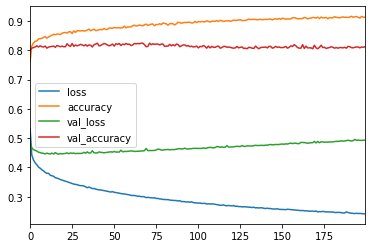

In [128]:
loss_df.plot()

We see that over 20 epochs, the loss is not improving a lot so we keep epochs = 20.

In [129]:
print(model.evaluate(test_images, test_labels, verbose=0))
print(model.evaluate(train_images, train_labels, verbose=0))

[0.49250203371047974, 0.8119999766349792]
[0.2379283905029297, 0.9150000214576721]


In [73]:
test_predictions = model.predict(test_images)
test_predictions = pd.Series(test_predictions.reshape(1000,))
test_predictions = test_predictions.apply(lambda x: 1 if x >= 0.5 else 0)
eval_df = pd.concat([pd.Series(test_labels), test_predictions], axis=1)
eval_df.columns = ['Test True Y', 'Model Predictions']

**Model Evaluation with RMSE**

In [74]:
mean_squared_error(eval_df['Test True Y'], eval_df['Model Predictions'])**0.5

0.4393176527297759

**Creating and Training a Better Model**

**Dealing with Overfitting and Evaluation**

In [130]:
early_stop = EarlyStopping(monitor = 'val_loss', 
                           mode = 'min', 
                           verbose = 1, 
                           patience = 25)

In [131]:
model2 = Sequential()

model2.add(Dense(1, input_dim=784, activation = 'sigmoid'))

model2.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics = ['accuracy'])

In [132]:
model2.fit(x = train_images, 
           y = train_labels, 
           epochs = 200, 
           validation_data=(test_images, test_labels),
           callbacks = [early_stop])

Epoch 1/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7160 - val_loss: 0.4943 - val_accuracy: 0.7780
Epoch 2/200
63/63 [==============================] - 0s 860us/step - loss: 0.4539 - accuracy: 0.8045 - val_loss: 0.4717 - val_accuracy: 0.8030
Epoch 3/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8115 - val_loss: 0.4638 - val_accuracy: 0.8100
Epoch 4/200
63/63 [==============================] - 0s 981us/step - loss: 0.4222 - accuracy: 0.8185 - val_loss: 0.4588 - val_accuracy: 0.8080
Epoch 5/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8230 - val_loss: 0.4556 - val_accuracy: 0.8090
Epoch 6/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8350 - val_loss: 0.4526 - val_accuracy: 0.8170
Epoch 7/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8335 - val_loss: 0.4527 - val_accuracy: 0.8160
Epoch 8/2

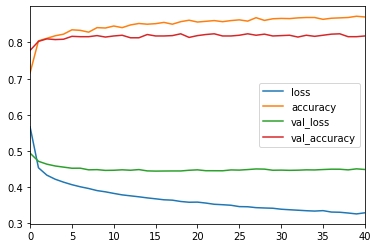

In [133]:
loss_df2 = pd.DataFrame(model2.history.history)
loss_df2.plot()

In [134]:
print(model2.evaluate(test_images, test_labels, verbose=0))
print(model2.evaluate(train_images, train_labels, verbose=0))

[0.4490884840488434, 0.8180000185966492]
[0.32193514704704285, 0.8755000233650208]


In [149]:
test_predictions = model2.predict(test_images)
test_predictions = pd.Series(test_predictions.reshape(1000,))
test_predictions = test_predictions.apply(lambda x: 1 if x >= 0.5 else 0)
eval_df = pd.concat([pd.Series(test_labels), test_predictions], axis=1)
eval_df.columns = ['Test True Y', 'Model Predictions']

**Model Evaluation with RMSE**

In [150]:
mean_squared_error(eval_df['Test True Y'], eval_df['Model Predictions'])**0.5

0.4266145801540308

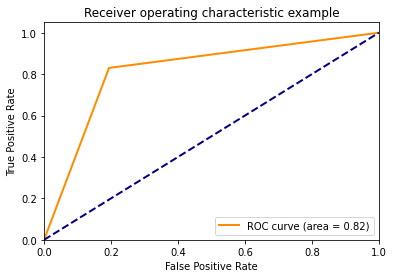

In [151]:
fpr, tpr, _ = roc_curve(test_labels, test_predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [152]:
print(classification_report(test_labels, test_predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       500
           1       0.81      0.83      0.82       500

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



In [117]:
print(confusion_matrix(test_labels, test_predictions))

[[416  84]
 [100 400]]
